Step 1 - import libararies and data set


In [61]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
data =pd.read_csv(r"C:\Users\syed9\Downloads\titanic.csv")

STEP - 2 understading the data

In [63]:
# how mamy rows and columns are present

print('number of rows :',data.shape[0])
print('number of columns:',data.shape[1])

data.shape

number of rows : 891
number of columns: 12


(891, 12)

In [64]:
#what are the name of the columns

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [65]:
#check out the first few and last few columns

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [67]:
#what are the dtypes of the columns identify the numerical and categorical columns

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [68]:
#what is the general information regarding the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
#what are the statistics of the numerical column
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
#what are the statistics of categorical column
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [71]:
#are there any missing values of the data ?deal with them
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
#age - 177 missing values ==> using mode()
#embarked - 2 missing values ==> using mode()
#cabin - 687 missing values ==> drop

how do we handle missing values

1.remove rows|columns if missing values is > 50%
2.filling the missing value with a particular value 
   -mean(numeric value - normal distributaion)
   -median(numeric value - which is right skewed)
   -mode ( fill categorical column)

In [73]:
#old method #data['Age'] = data['Age'].fillna(data['Age'].mean(),inplace=True)

#new update method 
data.fillna({'Age':data['Age'].mean()},inplace=True)

data.fillna({'Embarked':data['Embarked'].mode()[0]},inplace=True)

In [74]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [75]:
#are there any duplicates of the data? deal with them
data.duplicated().sum()

np.int64(0)

Step 3 - Data Visualization

what is the data trying to tell us

1.univariate analysis - analysing one column at a time
   - numerical  - histogram
   - numerical  - countplot
 

In [76]:
#histogram of all numerical columns

#num_col = data.select_dtypes(include=['float64','int64']).columns
num_col = ['Survived','Pclass','Age','SibSp','Parch','Fare']

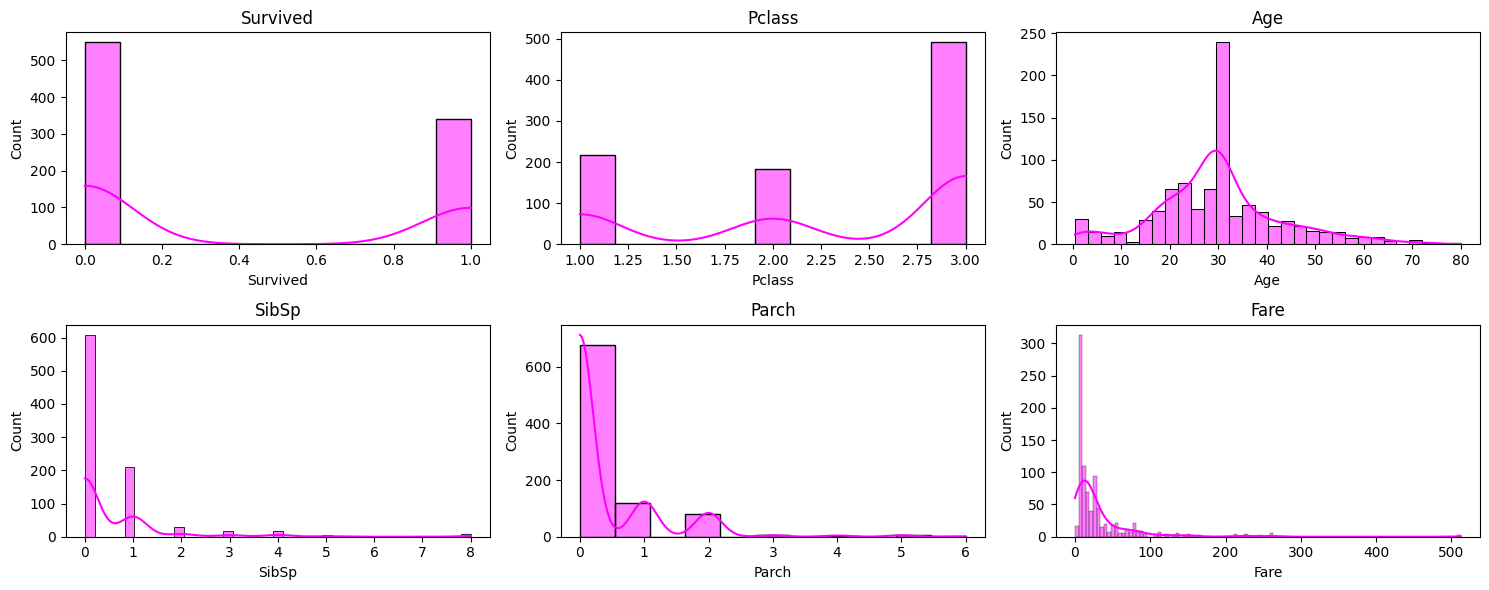

In [77]:
#create a 2x3 subplot grid to display the histogram of numeric data 
fig,axes = plt.subplots(2,3,figsize = (15,6))

for i, column in enumerate(num_col):
    row,col = divmod(i,3)  # calculate the row number
    sns.histplot(data=data,x = column,kde=True,ax = axes[row][col],color='magenta')
     
    axes[row][col].set_title(column)
     
plt.tight_layout()
plt.show()     

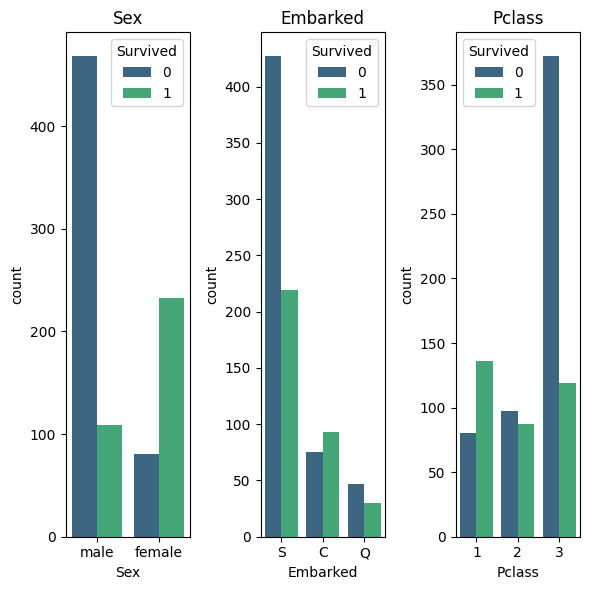

In [78]:
#polt cateegorical columns - using count plots

cat_col = ['Sex','Embarked','Pclass']

fig,axes = plt.subplots(1,3,figsize= (6,6))

for i,column in enumerate(cat_col):
    
    sns.countplot(data=data,x = column, ax = axes[i],palette ='viridis',hue='Survived')
    axes[i].set_title(column)
plt.tight_layout()
plt.show()    

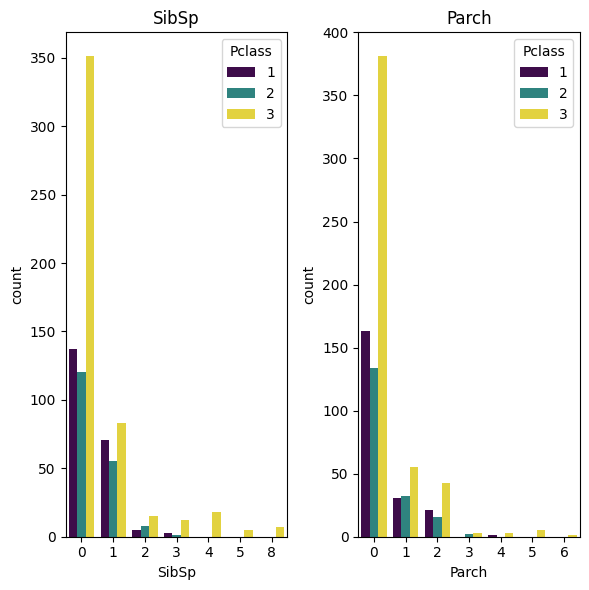

In [79]:
cat_col = ['SibSp','Parch']

fig,axes = plt.subplots(1,2,figsize= (6,6))

for i,column in enumerate(cat_col):
    
    sns.countplot(data=data,x = column, ax = axes[i],palette ='viridis',hue='Pclass')
    axes[i].set_title(column)
plt.tight_layout()
plt.show()    

Bivariate Analysis - Analayse tow variaables in a dataset
   
   -numerical vs numerical - ScatterPlot
   
   -Numerical vs Categorical - Boxplot,Barplot,voilinplot

   -categorical vs categorical - countplot(stacked),heatmap


<Axes: xlabel='Pclass', ylabel='Fare'>

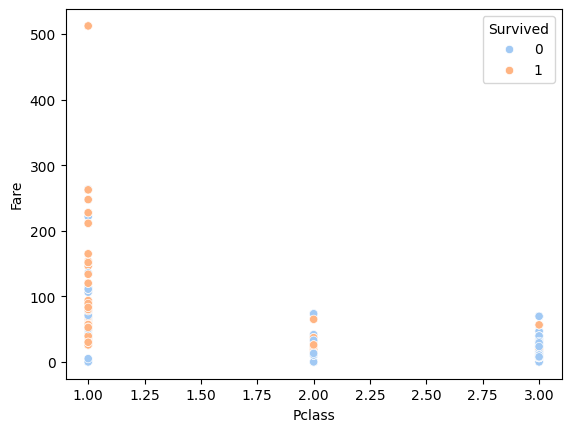

In [80]:
#was the fare difference to different Pclass
#cols1 : pclass col2 : fare ==> visualize using scatterplot

sns.scatterplot(data=data,x = 'Pclass',y = 'Fare',hue='Survived',palette='pastel')

<Axes: xlabel='Pclass', ylabel='Age'>

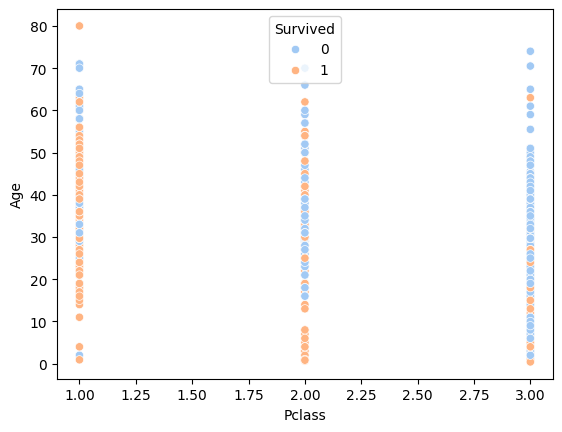

In [81]:
##  was the Pclass age specifc

#pclass ==> numeric  age ==> numeric : scatterplot

sns.scatterplot(data=data,x ='Pclass',y= 'Age',hue='Survived',palette='pastel' )

<Axes: xlabel='Pclass', ylabel='Fare'>

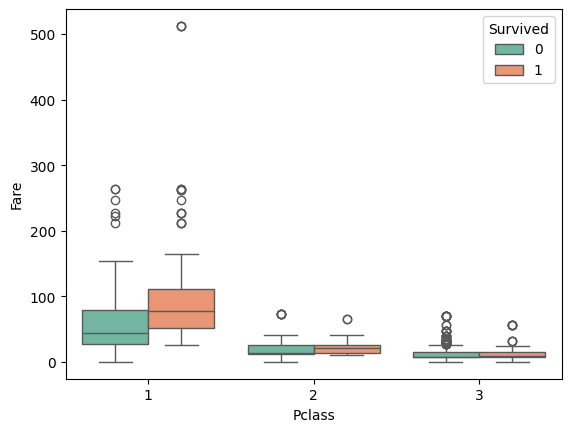

In [82]:
# numerical vs categorical : boxplot

# fare vs p class

sns.boxplot(data=data,x = 'Pclass',y = 'Fare',hue='Survived',palette='Set2')

Multivariate Analysis

-understanding relationship btw 3 or more columns

-heatmap(using correlation matrix):only on numerical columns

-3d scatter plots 

-pairplots

<Axes: >

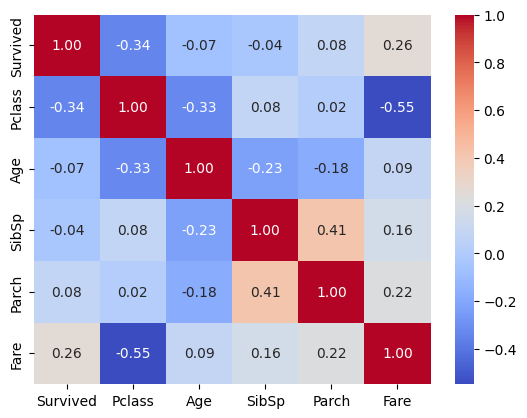

In [83]:
#numerical column ==> extract their correlation matrix ==> plot the results on the heatmap
#
#what is coorelation matrix
#it measure the linear relationship btw the numeric columns based on thier strength and direction

#correlation values changes from -1 to 1 
#-1 strong negative correlation 
#0 there is no correlation 
#1 strong positive correlation



num_col = ['Survived','Pclass','Age','SibSp','Parch','Fare']

#compute correlation matrix

coor_natrix = data[num_col].corr()

#heatmap
sns.heatmap(coor_natrix,annot=True,fmt='.2f',cmap='coolwarm')

<Axes: xlabel='Embarked', ylabel='Pclass'>

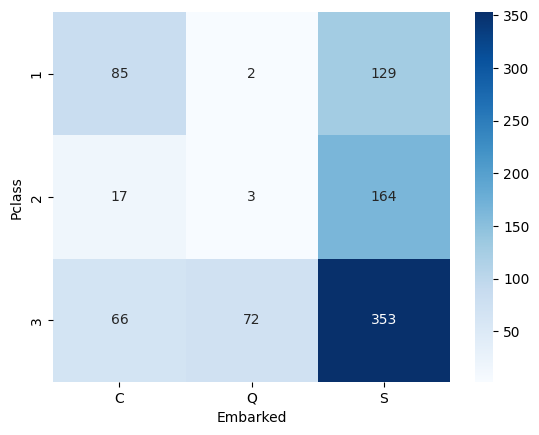

In [84]:
#heatmap for categorical data ==> cross-tabulation

cross_tab = pd.crosstab(data['Pclass'],data['Embarked'])

sns.heatmap(cross_tab,annot=True,cmap='Blues',fmt='d')

Step5 - removing irrelevant columns and checking for outliers

In [85]:
#irrelevent column
#passenger_id
#name
#cabin
#ticket


irr_col = ['PassengerId','Name','Cabin','Ticket']

In [86]:
data = data.drop(columns=irr_col)
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

check for ouliers

use box plot for visualising the column distribution

method 1 : IQR

method 2 : log transformation

<Axes: ylabel='Fare'>

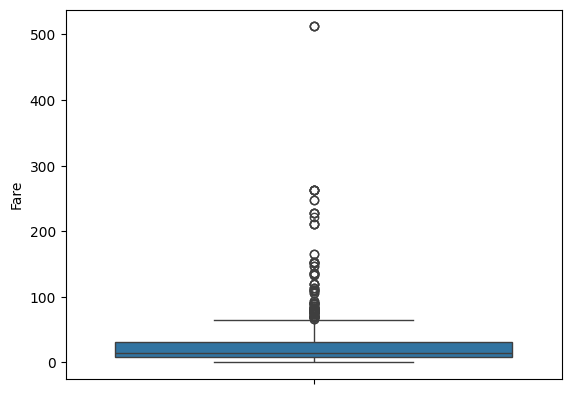

In [87]:
sns.boxplot(data['Fare'])

In [88]:
#IQR METHOD(not normal distrubution)
Q1 = np.percentile(data['Fare'],25)


In [89]:
Q3 = np.percentile(data['Fare'],75)

In [90]:
IQR = Q3-Q1
IQR

np.float64(23.0896)

In [91]:
LOWER_BOUND = Q1-1.5*IQR
LOWER_BOUND

np.float64(-26.724)

In [92]:
UPPER_BOUND = Q3 + 1.5*IQR
IQR

np.float64(23.0896)

In [93]:
outliers = data[(data['Fare']<LOWER_BOUND) | (data['Fare']>UPPER_BOUND)]

In [94]:
data = data[(data['Fare']>=LOWER_BOUND) & (data['Fare']<=UPPER_BOUND)]

In [95]:
data.shape

(775, 8)

In [96]:
outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.000000,1,0,71.2833,C
27,0,1,male,19.000000,3,2,263.0000,S
31,1,1,female,29.699118,1,0,146.5208,C
34,0,1,male,28.000000,1,0,82.1708,C
52,1,1,female,49.000000,1,0,76.7292,C
...,...,...,...,...,...,...,...,...
846,0,3,male,29.699118,8,2,69.5500,S
849,1,1,female,29.699118,1,0,89.1042,C
856,1,1,female,45.000000,1,1,164.8667,S
863,0,3,female,29.699118,8,2,69.5500,S


In [97]:
data.shape

(775, 8)

<Axes: xlabel='Fare', ylabel='Count'>

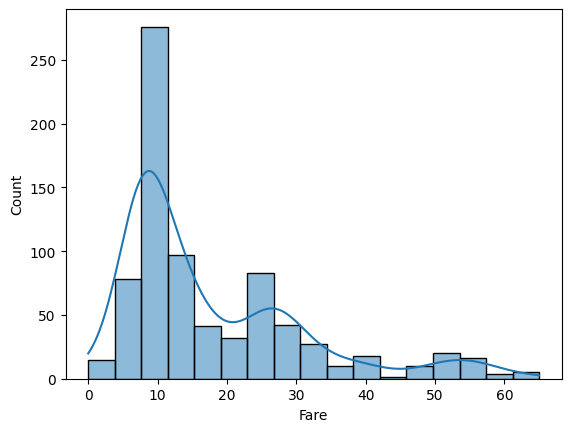

In [98]:
#method 2 - log transformation(used in right skewed data)


sns.histplot(data=data,x = "Fare",kde=True)

<Axes: xlabel='Fare_loc', ylabel='Count'>

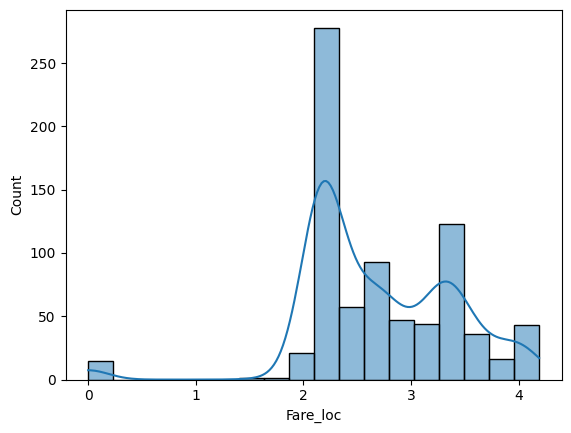

In [99]:
import numpy as np 
data['Fare_loc'] = np.log1p(data['Fare'])
sns.histplot(data=data,x = 'Fare_loc',kde=True)

Step 5 ENCODING CATEGORICAL COLUMNS

1- Nominal caregories :independent categiries they donot depend each other  (eg:colour) - one hot encoding is used

2-oridinal categories :there is hierarchy in categories (eg:education) - label encoding is used

In [100]:
#data['Embarked] ==> normial categories


embarked_enc = pd.get_dummies(data['Embarked'],prefix='emb',dtype=int)



#conactenate back to the data

data = pd.concat([data,embarked_enc],axis=1)



#drop original column

data.drop('Embarked',axis=1,inplace=True)

data.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_loc,emb_C,emb_Q,emb_S
0,0,3,male,22.000000,1,0,7.2500,2.110213,0,0,1
2,1,3,female,26.000000,0,0,7.9250,2.188856,0,0,1
3,1,1,female,35.000000,1,0,53.1000,3.990834,0,0,1
4,0,3,male,35.000000,0,0,8.0500,2.202765,0,0,1
5,0,3,male,29.699118,0,0,8.4583,2.246893,0,1,0


In [101]:
#categorical label encoding


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()




In [102]:
data['sex_encoded'] = data['Sex'].map({'male':0,'female':1})

In [103]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_loc,emb_C,emb_Q,emb_S,sex_encoded
0,0,3,male,22.000000,1,0,7.2500,2.110213,0,0,1,0
2,1,3,female,26.000000,0,0,7.9250,2.188856,0,0,1,1
3,1,1,female,35.000000,1,0,53.1000,3.990834,0,0,1,1
4,0,3,male,35.000000,0,0,8.0500,2.202765,0,0,1,0
5,0,3,male,29.699118,0,0,8.4583,2.246893,0,1,0,0


In [104]:
data_cleaned = data[['Survived','Pclass','Age','sex_encoded','SibSp','Parch','Fare_loc','emb_C','emb_Q','emb_S']]

data_cleaned.head()

,Survived,Pclass,Age,sex_encoded,SibSp,Parch,Fare_loc,emb_C,emb_Q,emb_S
0,0,3,22.000000,0,1,0,2.110213,0,0,1
2,1,3,26.000000,1,0,0,2.188856,0,0,1
3,1,1,35.000000,1,1,0,3.990834,0,0,1
4,0,3,35.000000,0,0,0,2.202765,0,0,1
5,0,3,29.699118,0,0,0,2.246893,0,1,0


Step 6 Scaling the data 

MIn - Max Scaler - Data does not follow normal distribution

Standered scaler - follow standered distribution

In [105]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [106]:
num_col = ['Age','Fare_loc']
data_cleaned.loc[:,num_col] = std.fit_transform(data_cleaned[num_col])

In [107]:
data_cleaned.head()

,Survived,Pclass,Age,sex_encoded,SibSp,Parch,Fare_loc,emb_C,emb_Q,emb_S
0,0,3,-0.556219,0,1,0,-0.824136,0,0,1
2,1,3,-0.243027,1,0,0,-0.713891,0,0,1
3,1,1,0.461654,1,1,0,1.812201,0,0,1
4,0,3,0.461654,0,0,0,-0.694393,0,0,1
5,0,3,0.046606,0,0,0,-0.632533,0,1,0


In [108]:
from sklearn.model_selection import train_test_split

In [112]:
X=data_cleaned.drop('Survived',axis=1)
y=data_cleaned['Survived']

In [115]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [114]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [116]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))


[[81 14]
 [25 35]]


In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81        95
           1       0.71      0.58      0.64        60

    accuracy                           0.75       155
   macro avg       0.74      0.72      0.72       155
weighted avg       0.74      0.75      0.74       155



In [120]:
import pickle
with open("lrmodel.pkl","wb") as f:
    pickle.dump(lr,f)